<a href="https://colab.research.google.com/github/SkovenForrest/Cellari_project/blob/Mask_RCNN/RCNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load data

In [ ]:
import torch
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader, Dataset
import glob
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#!ls drive/'My Drive'
!ls drive/'My Drive/Gland_dataset' &> /dev/null

images_path = 'drive/My Drive/Cellari_project/Gland_dataset/*'

In [ ]:
images = []
masks = []

# image preperation
train_images = glob.glob(images_path)
sorted_train_images = natsort.natsorted(train_images, reverse=False)


In [ ]:
for img in train_images:
    name_img = img.split("/")[-1].split(".")[0]
    imagg = name_img.split("_")[-1]
    if imagg == "anno":
        masks.append(img)
    else:
        images.append(img)

print(len(images))
print(len(masks))
#print(imagg)


165
165


In [ ]:
train_orig_images = []
train_masks = []

test_orig_images = []
test_masks = []

In [ ]:
for img in images:
    name_img = img.split("/")[-1].split(".")[0]
    imagg = name_img.split("_")[0]
    if imagg == "testA" or imagg == "testB":
        test_orig_images.append(img)
    else:
        train_orig_images.append(img)

for mask in masks:
    mask_img = mask.split("/")[-1].split(".")[0]
    imagg = mask_img.split("_")[0]
    if imagg == "testA" or imagg == "testB":
        test_masks.append(mask)
    else:
        train_masks.append(mask)


In [ ]:
print(len(train_orig_images), len(train_masks))
print(len(test_orig_images), len(test_masks))

85 85
80 80


In [ ]:
sorted_train_images = natsort.natsorted(train_orig_images, reverse=False)
sorted_train_masks = natsort.natsorted(train_masks, reverse=False)

sorted_test_images = natsort.natsorted(test_orig_images, reverse=False)
sorted_test_masks = natsort.natsorted(test_masks, reverse=False)

In [ ]:
#mean = (0.485, 0.456, 0.406)
#std = (0.229, 0.224, 0.225)
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])

transformations = transforms.Compose([transforms.Resize((512,512)) , transforms.ToTensor() , transforms.Normalize(mean, std)])



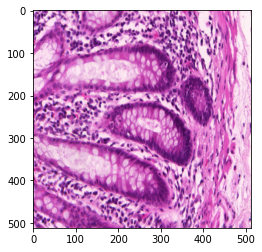

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
img = Image.open(sorted_train_images[61]).convert("RGB")
img = img.resize((512,512))
plt.imshow(img)

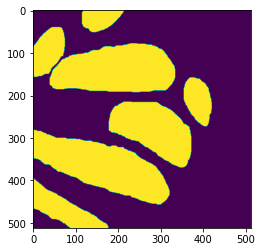

In [ ]:
#check mask
mask = Image.open(sorted_train_masks[61])
mask = mask.resize((512,512))
mask = np.array(mask)
for x in range(0,mask.shape[0]):
          for y in range(0, mask.shape[1]):
            if mask[x,y] >0:
              mask[x,y] = 255
plt.imshow(mask)

In [ ]:
"""
import os
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
j=34

img = Image.open(sorted_test_images[j]).convert("RGB")
plt.imshow(img)
# note that we haven't converted the mask to RGB,
# because each color corresponds to a different instance
# with 0 being background
mask = Image.open(sorted_test_masks[j])
plt.imshow(mask)
mask = np.array(mask)

# instances are encoded as different colors
obj_ids = np.unique(mask)
# first id is the background, so remove it
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set
# of binary masks
masks = mask == obj_ids[:, None, None]


# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(mask)
# get bounding box coordinates for each mask
num_objs = len(obj_ids)
boxes = []
class_to_remove = []
for i in range(num_objs):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])

    rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    if xmin != max and ymin != ymax:
      boxes.append([xmin, ymin, xmax, ymax])
    else :
      obj_ids = np.delete(obj_ids,i)

plt.show()
# convert everything into a torch.Tensor
boxes = torch.as_tensor(boxes, dtype=torch.float32)
# there is only one class
labels = torch.ones((num_objs,), dtype=torch.int64)
masks = torch.as_tensor(masks, dtype=torch.uint8)

image_id = torch.tensor([j])

target = {}
target["boxes"] = boxes
target["labels"] = labels
target["masks"] = masks
target["image_id"] = image_id

print("obj_ids",obj_ids)
print(boxes)
print("value at 201,311", mask[201,311])
"""

'\nimport os\nimport numpy as np\nimport torch\nfrom PIL import Image\nimport matplotlib.pyplot as plt\nfrom matplotlib.patches import Rectangle \nj=34\n\nimg = Image.open(sorted_test_images[j]).convert("RGB")\nplt.imshow(img)\n# note that we haven\'t converted the mask to RGB,\n# because each color corresponds to a different instance\n# with 0 being background\nmask = Image.open(sorted_test_masks[j])\nplt.imshow(mask)\nmask = np.array(mask)\n\n# instances are encoded as different colors\nobj_ids = np.unique(mask)\n# first id is the background, so remove it\nobj_ids = obj_ids[1:]\n\n# split the color-encoded mask into a set\n# of binary masks\nmasks = mask == obj_ids[:, None, None]\n\n\n# Create figure and axes\nfig,ax = plt.subplots(1)\n# Display the image\nax.imshow(mask)\n# get bounding box coordinates for each mask\nnum_objs = len(obj_ids)\nboxes = []\nclass_to_remove = []\nfor i in range(num_objs):\n    pos = np.where(masks[i])\n    xmin = np.min(pos[1])\n    xmax = np.max(pos[1])

In [ ]:
"""
for x in range(0,mask.shape[0]):
    for y in range(0, mask.shape[1]):
        if mask[x,y] == 6:
          print("coordinate", {x,y})
"""

'\nfor x in range(0,mask.shape[0]):\n    for y in range(0, mask.shape[1]):\n        if mask[x,y] == 6:\n          print("coordinate", {x,y})\n'

In [ ]:
import os
import numpy as np
import torch
from PIL import Image


class CellarDataset(object):
    def __init__(self, images, masks, transforms):
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = images
        self.masks = masks
        self.transforms = transforms

    def __getitem__(self, idx):
        #print("current idx =",idx)
        #print("len self.imgs =",len(self.imgs))
        img = Image.open(self.imgs[idx]).convert("RGB")
        #img = img.resize((512,512))
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(self.masks[idx])
        mask = mask.resize((512,512))
        
        mask = np.array(mask)
        #convert to black and white image
        for x in range(0,mask.shape[0]):
          for y in range(0, mask.shape[1]):
            if mask[x,y] >0:
              mask[x,y] = 255

        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            if xmax-xmin > 2 and ymax-ymin > 2 :
              boxes.append([xmin, ymin, xmax, ymax])
            else :
              obj_ids = np.delete(obj_ids,i)

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        #target["area"] = 1 
        #target["iscrowd"] = False 
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

#Modifying the model from a pretrained RCNN

In [ ]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return
# only the features
backbone = torchvision.models.mobilenet_v2(pretrained=True).features
# FasterRCNN needs to know the number of
# output channels in a backbone. For mobilenet_v2, it's 1280
# so we need to add it here
backbone.out_channels = 1280

# let's make the RPN generate 5 x 3 anchors per spatial
# location, with 5 different sizes and 3 different aspect
# ratios. We have a Tuple[Tuple[int]] because each feature
# map could potentially have different sizes and
# aspect ratios
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

# let's define what are the feature maps that we will
# use to perform the region of interest cropping, as well as
# the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to
# be [0]. More generally, the backbone should return an
# OrderedDict[Tensor], and in featmap_names you can choose which
# feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=["0"],
                                                output_size=7,
                                                sampling_ratio=2)
#roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=[0],
                                                #output_size=7,
                                                #sampling_ratio=2)

# put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                   num_classes=2,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)



Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

      
def get_instance_segmentation_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [ ]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 11481 (delta 20), reused 13 (delta 8), pack-reused 11433
Receiving objects: 100% (11481/11481), 12.82 MiB | 20.88 MiB/s, done.
Resolving deltas: 100% (8002/8002), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be37608 version check against PyTorch's CUDA version


In [ ]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [ ]:
# use our dataset and defined transformations
dataset = CellarDataset(sorted_train_images,sorted_train_masks,get_transform(train=True))
dataset_test = CellarDataset(sorted_test_images,sorted_test_masks,get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices_train = torch.randperm(len(dataset)).tolist()
indices_test = torch.randperm(len(dataset_test)).tolist()
#dataset = torch.utils.data.Subset(dataset, indices[:-50])
#dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])
#dataset = torch.utils.data.Subset(dataset, indices_train[:])
#dataset_test = torch.utils.data.Subset(dataset_test, indices_test[:])
dataset = torch.utils.data.Subset(dataset, indices_train[:])
dataset_test = torch.utils.data.Subset(dataset_test, indices_test[:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=5, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)


print(indices_train)
print(len(dataset))

[70, 60, 72, 5, 83, 78, 33, 48, 8, 9, 6, 44, 3, 84, 26, 55, 37, 74, 14, 71, 25, 58, 75, 39, 68, 61, 18, 57, 66, 4, 21, 69, 32, 11, 29, 30, 40, 67, 22, 43, 15, 82, 51, 54, 63, 50, 0, 46, 81, 53, 79, 2, 56, 77, 59, 24, 76, 23, 20, 35, 7, 36, 65, 62, 73, 12, 28, 42, 10, 49, 17, 27, 13, 38, 80, 34, 19, 47, 64, 52, 1, 31, 16, 41, 45]
85


In [ ]:
"""
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                   num_classes=2,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)
"""

"\ndevice = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')\n\n# our dataset has two classes only - background and person\nnum_classes = 2\n\n# put the pieces together inside a FasterRCNN model\nmodel = FasterRCNN(backbone,\n                   num_classes=2,\n                   rpn_anchor_generator=anchor_generator,\n                   box_roi_pool=roi_pooler)\n# move model to the right device\nmodel.to(device)\n\n# construct an optimizer\nparams = [p for p in model.parameters() if p.requires_grad]\noptimizer = torch.optim.SGD(params, lr=0.005,\n                            momentum=0.9, weight_decay=0.0005)\n\n# and a learning rate scheduler which decreases the learning rate by\n# 10x every 3 epochs\nlr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,\n                                               step_size=3,\n                                               gamma=0.1)\n"

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


In [ ]:
# let's train it for 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Epoch: [0]  [ 0/17]  eta: 0:04:15  lr: 0.000317  loss: 3.4365 (3.4365)  loss_classifier: 0.5246 (0.5246)  loss_box_reg: 0.1155 (0.1155)  loss_mask: 2.7700 (2.7700)  loss_objectness: 0.0043 (0.0043)  loss_rpn_box_reg: 0.0221 (0.0221)  time: 15.0250  data: 13.7267  max mem: 5516
Epoch: [0]  [10/17]  eta: 0:00:26  lr: 0.003439  loss: 1.2239 (1.8787)  loss_classifier: 0.1376 (0.2322)  loss_box_reg: 0.1038 (0.0925)  loss_mask: 0.9393 (1.4806)  loss_objectness: 0.0286 (0.0371)  loss_rpn_box_reg: 0.0356 (0.0362)  time: 3.7854  data: 2.7930  max mem: 5795
Epoch: [0]  [16/17]  eta: 0:00:03  lr: 0.005000  loss: 0.9921 (1.5275)  loss_classifier: 0.0742 (0.1665)  loss_box_reg: 0.0926 (0.0887)  loss_mask: 0.8043 (1.2078)  loss_objectness: 0.0286 (0.0361)  loss_rpn_box_reg: 0.0200 (0.0283)  time: 3.3399  data: 2.4020  max mem: 5795
Epoch: [0] Total time: 0:00:56 (3.3445 s / it)
creating index...
index created!
Test:  [ 0/80]  eta: 0:03:17  model_time: 0.2281 (0.2281)  evaluator_time: 0.0499 (0.0499)

In [ ]:
print(dataset_test)

In [ ]:
# pick one image from the test set
img, _ = dataset_test[0]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

In [ ]:
prediction

[{'boxes': tensor([[ 30.9234,   5.8309, 247.0718, 442.0000],
          [237.4061,   0.0000, 453.4087, 439.9102],
          [339.6146,  41.8407, 554.7618, 442.0000],
          [110.1075, 185.3541, 580.3568, 420.0026],
          [133.7747,   0.0000, 349.4303, 405.0933],
          [  0.0000, 185.7338, 339.1961, 422.0409],
          [ 57.6621,  47.0092, 434.3387, 442.0000],
          [ 39.5931, 264.7025, 513.3083, 442.0000],
          [114.1749,  54.9268, 577.0646, 288.2438],
          [249.4143, 120.8434, 581.0000, 354.7659],
          [  0.0000,  87.8740, 334.9399, 323.1684],
          [  0.0000,  21.7610, 403.9756, 257.5160],
          [245.6638,   0.0000, 581.0000, 222.7817],
          [ 38.3956,   0.0000, 510.2586, 180.0297]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.000

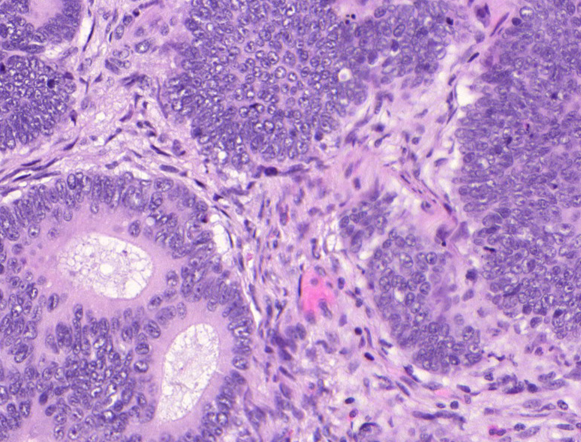

In [ ]:
Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

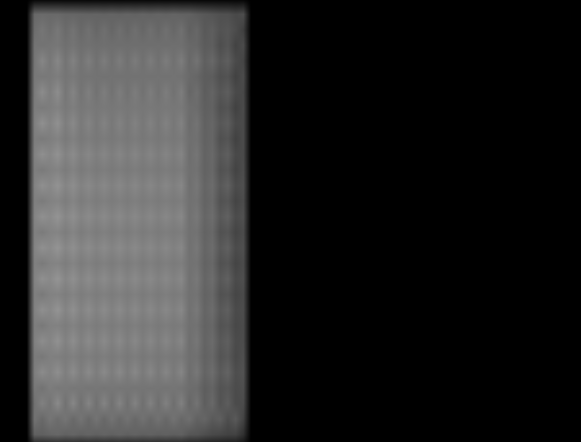

In [ ]:
Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())

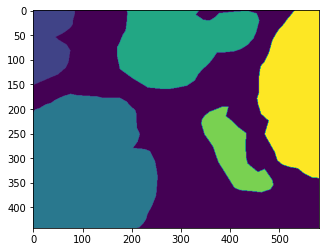

In [ ]:
img2 = dataset_test.dataset.masks[15]
img2 = Image.open(img2)
plt.imshow(img2)
